In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Exploration

In [67]:
df=pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [68]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [69]:
df.shape

(30, 3)

#here the number of rows are 30 and columns are 3 

In [70]:
df.dtypes

Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

# DATA CLEANING

In [71]:
df= df.drop('Unnamed: 0', axis=1)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


# here the shape of the dataset is now columns=2 and rows=30
# here we dropped the column Unnamed :0 as it was not needed

# Checking for missing values

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [73]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### No missing values found

In [74]:
df.duplicated().sum()

0

### No duplicates found. So, let's move towards understanding dataset

## Descriptive statistics

In [75]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [76]:
median_years = df['YearsExperience'].median()
median_salary = df['Salary'].median()
print(f"Median Years of Experience: {median_years}")
print(f"Median Salary: {median_salary}")

Median Years of Experience: 4.8
Median Salary: 65238.0


In [45]:
mode_years = df['YearsExperience'].mode()[0]
mode_salary = df['Salary'].mode()[0]
print(f"Mode Years of Experience: {mode_years}")
print(f"Mode Salary: {mode_salary}")

Mode Years of Experience: 3.3000000000000003
Mode Salary: 37732.0


## Descriptive statistics
* Average experience:  5 years	
* Avereage of Salary: 76004 rs
* Median Years of Experience: 4.8
* Median Salary: 65238 rs
* Most commonly occuring Years of Experience: 3 yrs
* Mode Salary: 37732 rs

## Conclusion
* The mean and mode are not matching as most people have 5 yrs of exp but common occuring is 3 ys, does this mean there are outlier? 
* The average salary is high, but the typical salary is about 65,238 INR. Many people earn 37,732 INR, which may be due to lower-paying jobs.

# Checking for Outliers

In [46]:
for column in ['YearsExperience', 'Salary']:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in YearsExperience:
Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []
Outliers in Salary:
Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []


#### Ok, so there are no outliers so lets check for skewdness in histogram
# Univariate Analysis


<Axes: xlabel='YearsExperience', ylabel='Count'>

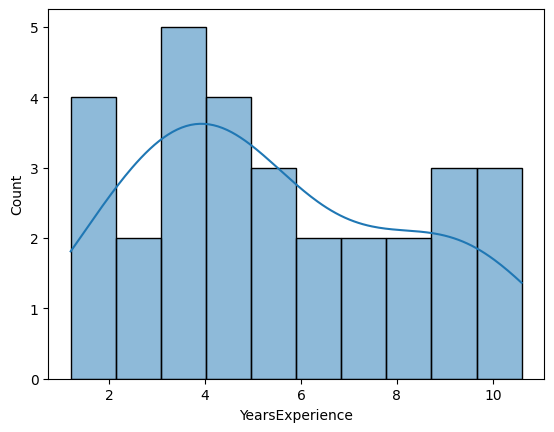

In [47]:
sns.histplot(df['YearsExperience'],bins=10,kde=True)

* Most employees have 3–5 years of experience.
* Fewer employees have 8+ years of experience.
* The distribution is slightly right-skewed.
* The peak frequency is around 4 years of experience.

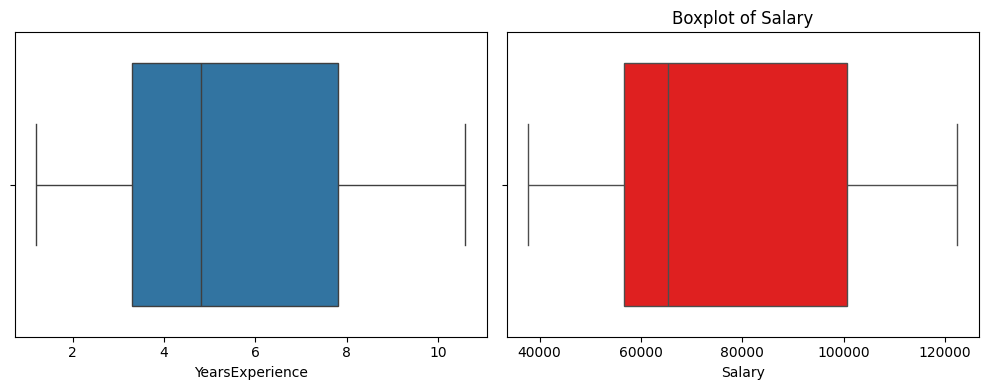

In [48]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['YearsExperience'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Salary'], color='red')
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

### - most people are haveing more than four years of exp.
### - Most people are having salaray more than 60k above


### Many people are not new employers

# Bivariate Analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

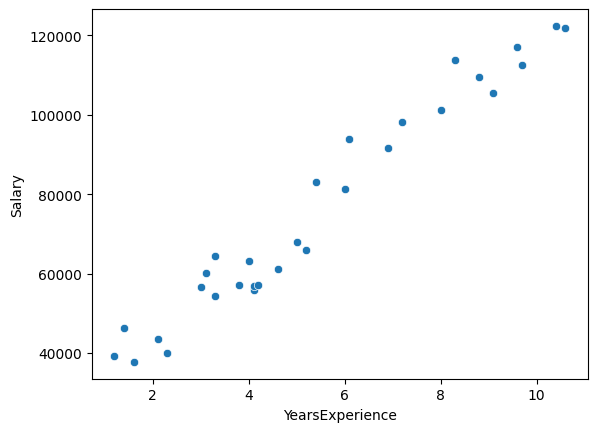

In [49]:
sns.scatterplot(df,x='YearsExperience',y='Salary')

* the more experience the more the salary

<Axes: >

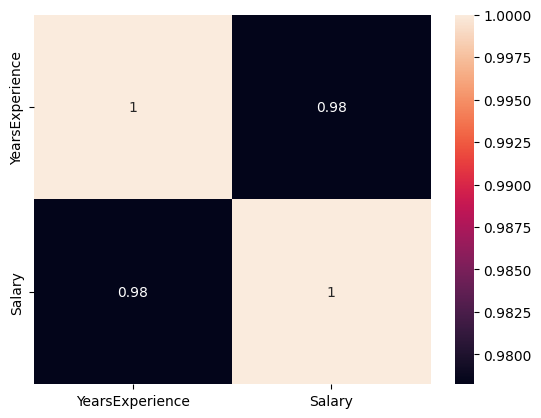

In [50]:
x=df.corr()
sns.heatmap(x,annot=True)


* ### Insights:
* Positive Trend: Salary increases as Years of Experience increase.
* Linear Relationship: The regression line shows a strong linear correlation.
* Consistent Growth: Salary growth is steady without significant fluctuations.
* Minor Deviations: Some points slightly deviate from the regression line, indicating outliers or individual variations.

In [51]:
print("Skewness of YearsExperience:", df['YearsExperience'].skew())
print("Skewness of Salary:", df['Salary'].skew())
df['YearsExperience_log'] = np.log1p(df['YearsExperience'])  # log1p handles zero values
df['Salary_log'] = np.log1p(df['Salary'])
X = df[['YearsExperience_log']]
y = df['Salary_log']


Skewness of YearsExperience: 0.37956024064804234
Skewness of Salary: 0.35411967922959153


In [52]:
#As there is variation in the salary and Years of Experience 
#so lets perform minmax scaling and normalize it into the range 0 to 1 

from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()
df['YearsExperience']=min.fit_transform(df[['YearsExperience']])

In [53]:
df['YearsExperience']

0     0.000000
1     0.021277
2     0.042553
3     0.095745
4     0.117021
5     0.191489
6     0.202128
7     0.223404
8     0.223404
9     0.276596
10    0.297872
11    0.308511
12    0.308511
13    0.319149
14    0.361702
15    0.404255
16    0.425532
17    0.446809
18    0.510638
19    0.521277
20    0.606383
21    0.638298
22    0.723404
23    0.755319
24    0.808511
25    0.840426
26    0.893617
27    0.904255
28    0.978723
29    1.000000
Name: YearsExperience, dtype: float64

In [54]:
df['Salary']=min.fit_transform(df[['Salary']])
df['Salary']

0     0.019041
1     0.100094
2     0.000000
3     0.068438
4     0.025514
5     0.223376
6     0.264812
7     0.197425
8     0.315545
9     0.229837
10    0.301051
11    0.213359
12    0.227097
13    0.228561
14    0.276163
15    0.356804
16    0.334255
17    0.535755
18    0.515379
19    0.663938
20    0.637928
21    0.715119
22    0.750898
23    0.898665
24    0.846917
25    0.801453
26    0.935956
27    0.884763
28    1.000000
29    0.993870
Name: Salary, dtype: float64

# Log Transformation:
As the skewness of the dataset is not that good so for that we will perform the Logtransformation 

so that it will give more accuracy when is model is built

In [55]:
from sklearn.preprocessing import FunctionTransformer

In [56]:
trans=FunctionTransformer(np.log1p)
df['YearsExperience']=trans.fit_transform(df['YearsExperience'])

C:\Users\Prince\AppData\Local\Temp\ipykernel_8732\2989183013.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'],hist=False)


<Axes: xlabel='YearsExperience', ylabel='Density'>

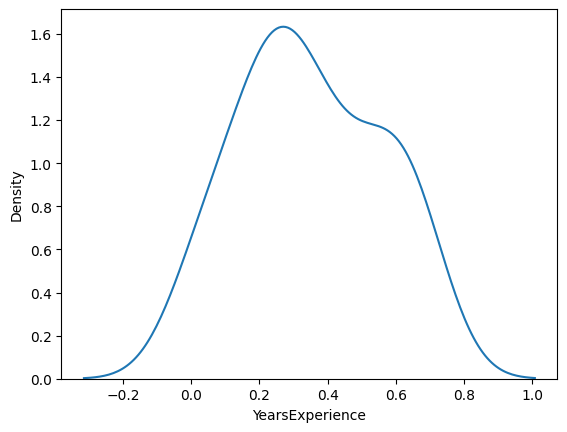

In [57]:
sns.distplot(df['YearsExperience'],hist=False)

C:\Users\Prince\AppData\Local\Temp\ipykernel_8732\3074104885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'],hist=False)


<Axes: xlabel='Salary', ylabel='Density'>

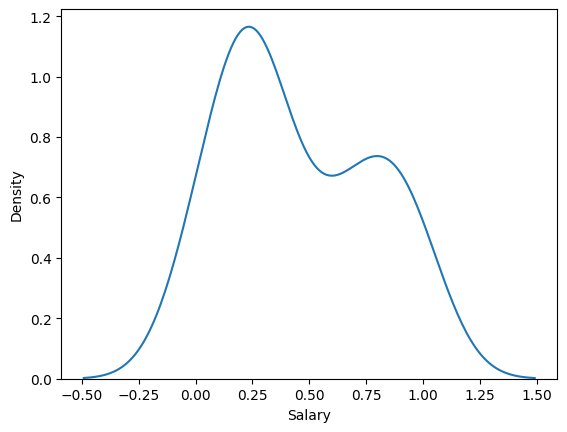

In [58]:
sns.distplot(df['Salary'],hist=False)

In [59]:
df['Salary']=trans.fit_transform(df['Salary'])
df['Salary']

0     0.018862
1     0.095396
2     0.000000
3     0.066198
4     0.025194
5     0.201614
6     0.234924
7     0.180173
8     0.274251
9     0.206882
10    0.263173
11    0.193393
12    0.204651
13    0.205844
14    0.243858
15    0.305132
16    0.288373
17    0.429022
18    0.415666
19    0.509187
20    0.493432
21    0.539483
22    0.560129
23    0.641151
24    0.613518
25    0.588593
26    0.660601
27    0.633802
28    0.693147
29    0.690077
Name: Salary, dtype: float64

C:\Users\Prince\AppData\Local\Temp\ipykernel_8732\3074104885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'],hist=False)


<Axes: xlabel='Salary', ylabel='Density'>

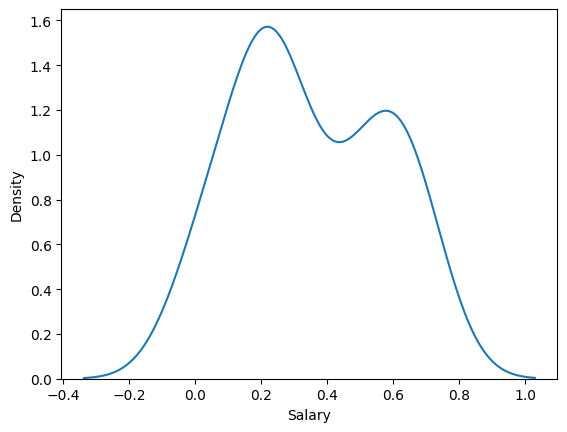

In [60]:
sns.distplot(df['Salary'],hist=False)

# Model Building and Evaluation

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

* Feature Engineering: Polynomial Features
* Adding polynomial terms can help capture non-linear relationships.

In [62]:
X = np.random.rand(100, 1)
y = 3 * X**2 + 2 * X + 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plo = PolynomialFeatures()
X_train_pol = plo.fit_transform(X_train)
X_test_pol = plo.transform(X_test)

In [63]:
print("Original X_train:")
print(X_train[:5])  # Display the first 5 rows of the original training data

print("\nTransformed X_train_pol:")
print(X_train_pol[:5])  # Display the first 5 rows of the transformed training data


Original X_train:
[[0.50183245]
 [0.70005759]
 [0.66191287]
 [0.95544594]
 [0.0995875 ]]

Transformed X_train_pol:
[[1.         0.50183245 0.2518358 ]
 [1.         0.70005759 0.49008063]
 [1.         0.66191287 0.43812865]
 [1.         0.95544594 0.91287694]
 [1.         0.0995875  0.00991767]]


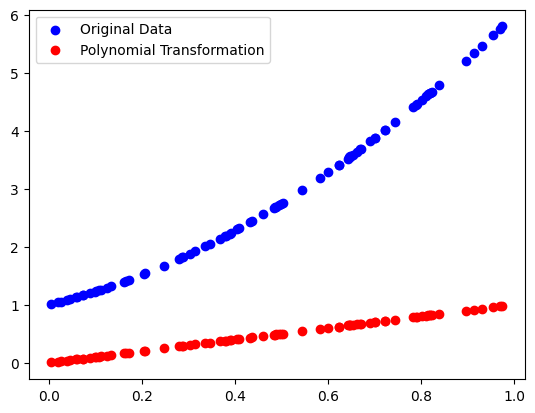

In [64]:
plt.scatter(X_train, y_train, color="blue", label="Original Data")
plt.scatter(X_train, X_train_pol[:, 1], color="red", label="Polynomial Transformation")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_pol, y_train)
y_pre = linear.predict(X_test_pol)
r2 = r2_score(y_test, y_pre)
print(f"R² Score: {r2}")

R² Score: 1.0
